In [2]:
import numpy as np
import pandas as pd
import csv

In [3]:
csv_path = '/Users/david/Documents/Onedrive/Desktop/21.8-21.12/data analysis cyberrisk/project/tweets.csv'
twi_path = '/Users/david/Documents/Onedrive/Desktop/21.8-21.12/data analysis cyberrisk/project/output-onlinetsvtools.csv'
x = pd.read_csv(twi_path)


In [60]:
r = csv.reader(open(csv_path, encoding='utf-8'))
lines = []
csv_num = 0
sentences = []
for line in r:
    csv_num+=1
    if csv_num==1:
        continue
    if line[7].upper() != line[7].lower():
        lines.append(line)
        sentences.append(line[7])

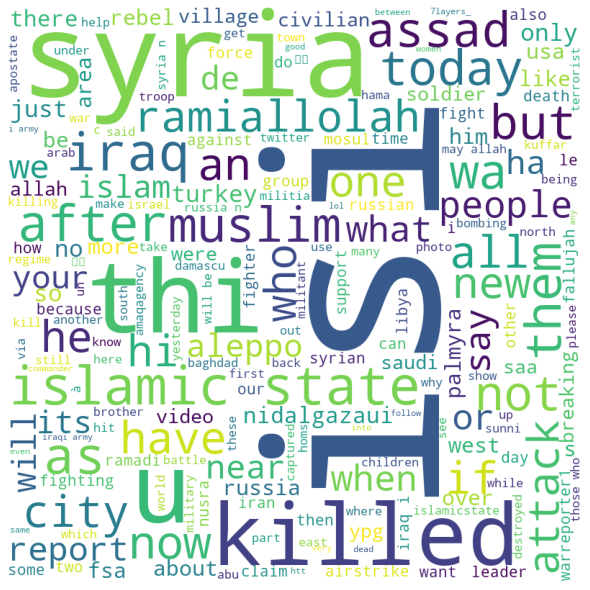

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords =set( ['it','amp','their','that','rt', 'at', 'of', 'https', 'co', 'in', 'the', 'http', 'is',
       'and', 'to',  'me', 'my', 'al', 'by', 'on', 'from', 'are', 'they', 'with',  'you',
        'job','a','t','for'])
#stopwords =set( ['it','their','that', 'at', 'of',  'co', 'in', 'the', 'is','and', 'to',  'me', 'my', 'al', 'by', 'on', 'from', 'are', 'they', 'with',  'you','job','a','t','for'])

r = csv.reader(open(csv_path, encoding='utf-8'))
lines = []
csv_num = 0
sentences = []
for line in r:
    sen = line[7]
    # split the value
    tokens = sen.split(' ')
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud_isis.png") 
plt.show()


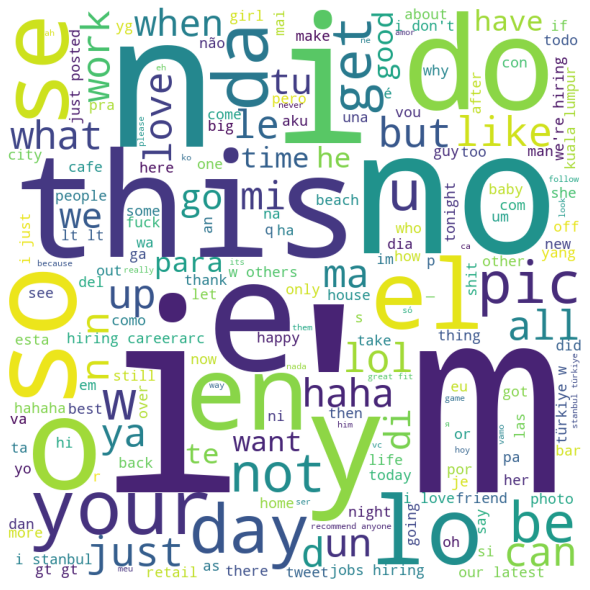

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords =set( ['it','amp','their','that','rt', 'at', 'of', 'https', 'co', 'in', 'the', 'http', 'is',
       'and', 'to',  'me', 'my', 'al', 'by', 'on', 'from', 'are', 'they', 'with',  'you',
        'job','a','t','for','de','que','la'])
#stopwords =set( ['it','their','that', 'at', 'of',  'co', 'in', 'the', 'is','and', 'to',  'me', 'my', 'al', 'by', 'on', 'from', 'are', 'they', 'with',  'you','job','a','t','for'])

r = csv.reader(open(twi_path, encoding='utf-8'))
lines = []
csv_num = 0
sentences = []
for line in r:
    sen = line[3]
    # split the value
    tokens = sen.split(' ')
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud_eng.png") 
plt.show()


In [61]:
r = csv.reader(open(twi_path, encoding='utf-8'))
twitts = []
csv_num = 0
norm_sen = []
for line in r:
    csv_num+=1
    if csv_num==1:
        continue
    if line[3].upper() != line[3].lower():
        twitts.append(line)
        norm_sen.append(line[3])

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os 
import copy
stopwords =set( ['it','their','that', 'at', 'of', 'co', 'in', 'the',  'is',
       'and', 'to',  'me', 'my', 'by', 'on', 'from', 'are', 'they', 'with',  'you',
        'job','a','t','for'])
tfidf_vectorizer =   TfidfVectorizer(input='content', min_df=1, max_features= 500, decode_error = 'ignore')
#tfidf_vectorizer =   TfidfVectorizer(input='content', min_df=1, max_features= 500, stop_words = stopwords, decode_error = 'ignore')
total_sen = copy.deepcopy(sentences)
total_sen.extend(norm_sen)
total_data = tfidf_vectorizer.fit_transform(total_sen)
num_pos = len(sentences)
num_neg = len(norm_sen)


In [99]:
t_data = np.asarray(total_data.todense())

model_rf = RandomForestClassifier(n_estimators=100)

y_total = np.zeros([t_data.shape[0],1])
y_total[0:num_pos] = 1
x_total = t_data #np.concatenate([,axis=0)
from random import shuffle
index_shuf = list(range(x_total.shape[0]))
shuffle(index_shuf)
x_total = x_total[index_shuf,]
y_total = y_total[index_shuf]
total_sen_shuffle = np.array(total_sen)[index_shuf]
test_p = 0.2
test_id = int(test_p * x_total.shape[0])
x_train = x_total[test_id:,]
y_train = y_total[test_id:,]
x_test = x_total[:test_id]
y_test = y_total[:test_id]
total_sen_shuffle_test = total_sen_shuffle[:test_id]
model_rf.fit(x_train, y_train.reshape(-1))


RandomForestClassifier()

In [114]:
total_sen_shuffle_test[fnidx]

array(['@Karameh_Souriya I think 2 months or close to 2 moths',
       "@real_kashmiri thank you, though it's not my BD and we don't celebrate it :)",
       'Time to learn French..', 'Watto has Vetto power today.',
       '@_ishfaqahmad gawa-e-hindh closer than ever',
       'Meanwhile in #Gaza. https://t.co/CtXdFmbvAm', '@OttomanAkh cool',
       "@CrypticLion1 I don't have snapchat",
       '@KhateebAlUmawi OMG the Afghan caracters I dying ahahahhahahha',
       'F\n@KhilafahNews2\n@KhilafahNews2\n@KhilafahNews2',
       '@WilayatNinawa so if you think u really know me.well your wrong! Hahahaha',
       '@El_Maghrebi great map',
       '@hajar_cantlie01 Iremove kabisa kutoka twt maana hawa makafiri wanahack a/c',
       '@wordsburning2 @__alfresco__ Oooops',
       '@1_texanna @spicylatte123 @ScotsmanInfidel @Ele7vn hahaha 🐖🐖😅😅',
       '@saladinisback1 looooool', '@118mostf @dnanmhmd51_51',
       '@BanatulUmmah  07899000930***',
       '@espncricinfo Ellyse Perry you beauty! :D :P

In [113]:
fpidx= np.where(pred_rf.reshape(-1)-y_test.reshape(-1) ==1)[0]
fnidx= np.where(pred_rf.reshape(-1)-y_test.reshape(-1) ==-1)[0]

0.12078956899674032

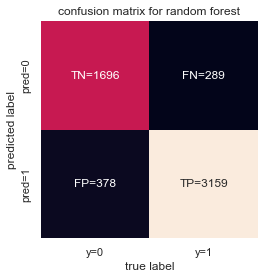

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn import metrics

pred_rf = model_rf.predict(x_test)

mat = confusion_matrix(y_test, pred_rf)
mat = mat.T
labels = (np.asarray(["TN={}".format(mat[0,0]), "FN={}".format(mat[0,1]), \
                     "FP={}".format(mat[1,0]), "TP={}".format(mat[1,1]),])).reshape(2, 2)
fig, ax = plt.subplots()
plt.title("confusion matrix for random forest")
sns.heatmap(mat, square=True, annot=labels, cbar=False,fmt = '' ,
            xticklabels=["y=0","y=1"], yticklabels=["pred=0","pred=1"])
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.show()
plt.savefig('confusion.png')
(mat[0][1]+mat[1][0])/ sum(sum(mat))

In [78]:
from sklearn.metrics import classification_report
target_names= ['isis','normal']
print(classification_report(y_test, pred_rf, target_names=target_names))

              precision    recall  f1-score   support

        isis       0.85      0.82      0.83      2081
      normal       0.89      0.91      0.90      3441

    accuracy                           0.88      5522
   macro avg       0.87      0.86      0.87      5522
weighted avg       0.88      0.88      0.88      5522



In [15]:
importances = model_rf.feature_importances_

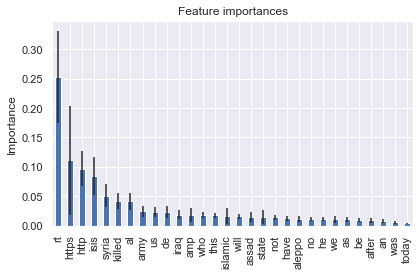

In [72]:
import pandas as pd
importances = model_rf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

sort_idx = np.argsort(-importances)
feature_names=feature_names[sort_idx]
importances = importances[sort_idx] 
std = std[sort_idx]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")
fig.tight_layout()
fig.savefig('importance.png')